In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=de080d914b99eb610245393da95a0f513f573d7a4aee32322119fbdde0e672a4
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


<ipython-input-2-d7eb4c1571d7>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(som._weights[:, :, 0], som._weights[:, :, 1], c="blue", marker="+", cmap='viridis')


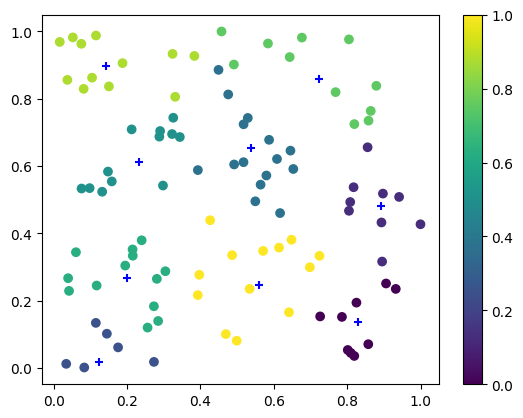

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Generate some random data points
data = np.random.rand(100, 2)

# Define the size of the grid
grid_size_x = 3
grid_size_y = 3
# Initialize the MiniSom object with the appropriate parameters
som = MiniSom(grid_size_x, grid_size_y, 2, sigma=0.3, learning_rate=0.5)
som.random_weights_init(data)
# Train the SOM on the data
som.train_random(data, 100)

# Get the cluster assignments for each data point
cluster_assignments = np.zeros((len(data)))
for i, datapoint in enumerate(data):
    x, y = som.winner(datapoint)
    cluster_assignments[i] = x * grid_size_y + y

# Plot the data points, colored by cluster assignment
plt.scatter(data[:,0], data[:,1], c=cluster_assignments, cmap='viridis')
plt.scatter(som._weights[:, :, 0], som._weights[:, :, 1], c="blue", marker="+", cmap='viridis')
plt.colorbar()
plt.show()


In [ ]:
import cv2
import copy
def create_plot(RGBim):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    plt.imshow(RGBim)
    plt.show()


def read_Lab_img_in_arr(BGRim):
    LABim = cv2.cvtColor(BGRim, cv2.COLOR_BGR2Lab)
    LABna = LABim.reshape([-1, 3])
    width = LABim.shape[1]
    return LABna, width


def convert_arr_to_RGBimg(LABna, width):
    matrix = np.reshape(LABna, (-1, width, 3))
    RGBim = cv2.cvtColor(matrix, cv2.COLOR_Lab2RGB)
    return RGBim


def change_img_pixels(centers, nearest_class, LABna, width):
    LABna_new = copy.deepcopy(LABna)
    num_classes = centers.shape[0]
    for i in range(num_classes):
        LABna_new[nearest_class == i, :] = centers[i, :]
    matrix = np.reshape(LABna_new, (-1, width, 3))
    RGBim = cv2.cvtColor(matrix, cv2.COLOR_Lab2RGB)
    return RGBim

def plot_scatter(x, y, z, colors='blue'):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=1, c=colors)
    # Set the labels for the 3D plot
    ax.set_xlabel('L')
    ax.set_ylabel('A')
    ax.set_zlabel('B')

    # Show the plot
    plt.show()

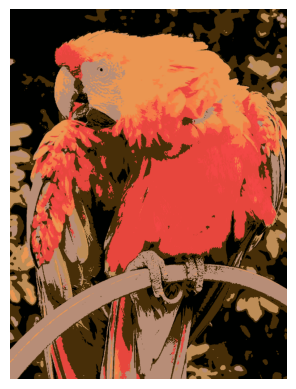

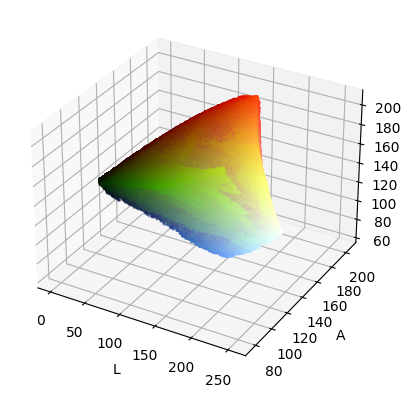

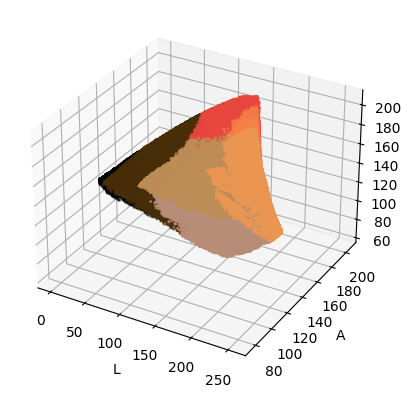

In [ ]:
BGRim = cv2.imread(r"/content/10-colourful-birds.jpg")
RGBim_original = cv2.cvtColor(BGRim, cv2.COLOR_BGR2RGB)
data, width = read_Lab_img_in_arr(BGRim)

# Define the size of the grid
grid_size_x = 3
grid_size_y = 3
# Initialize the MiniSom object with the appropriate parameters
som = MiniSom(grid_size_x, grid_size_y, 3, sigma=0.3, learning_rate=0.5)
som.random_weights_init(data)
# Train the SOM on the data
som.train_random(data, 100)

# Get the cluster assignments for each data point
cluster_assignments = np.zeros((len(data)))
for i, datapoint in enumerate(data):
    x, y = som.winner(datapoint)
    cluster_assignments[i] = x * grid_size_y + y

nearest_class = som._weights.reshape((-1, 3))
RGBim = change_img_pixels(nearest_class, cluster_assignments, data, width)
create_plot(RGBim)
l, a, b = data[:, 0], data[:, 1], data[:, 2]
colors = RGBim.reshape((len(l), 3))/255
colors_rgb = RGBim_original.reshape((len(l), 3))/255
plot_scatter(l, a, b, colors_rgb)
plot_scatter(l, a, b, colors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, n_input, n_output, learning_rate=0.1):
        self.n_input = n_input
        self.n_output = n_output
        self.learning_rate = learning_rate
        self.weights = np.random.rand(n_output[0], n_output[1], n_input)

    def train(self, data, num_epochs=100):
        for epoch in range(num_epochs):
            print("Epoch: ", epoch)
            for x in data:
                bmu = self.find_best_matching_unit(x)
                self.update_weights(bmu, x, epoch, num_epochs)

    def find_best_matching_unit(self, x):
        distances = np.zeros((self.n_output[0], self.n_output[1]))
        for i in range(self.n_output[0]):
            for j in range(self.n_output[1]):
                distances[i,j] = np.linalg.norm(x - self.weights[i,j])
        bmu = np.unravel_index(np.argmin(distances), distances.shape)
        return bmu

    def update_weights(self, bmu, x, epoch, num_epochs):
        lr = self.learning_rate * (1 - epoch/num_epochs)
        for i in range(self.n_output[0]):
            for j in range(self.n_output[1]):
                dist = np.linalg.norm(np.array(bmu) - np.array([i,j]))
                if dist < 2:
                    self.weights[i,j] += lr * (x - self.weights[i,j])


    def predict(self, data):
        y = np.zeros(len(data), dtype='int')
        for i, x in enumerate(data):
            bmu = self.find_best_matching_unit(x)
            y[i] = bmu[0] * self.n_output[1] + bmu[1]
        return y



Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

<ipython-input-7-f2e5d59ebe80>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(som.weights[:, :, 0], som.weights[:,:, 1], c="blue",  marker="+", cmap='viridis')


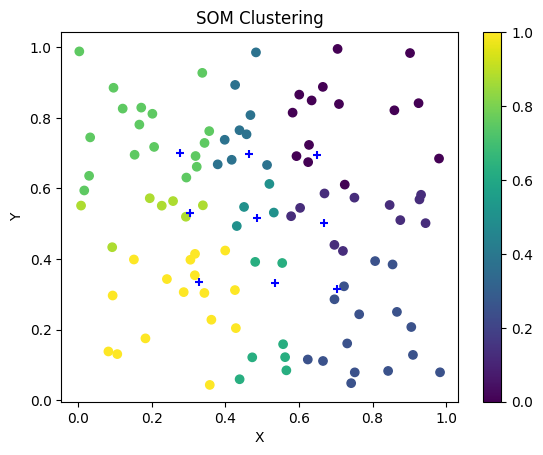

In [ ]:
# Generate random data
np.random.seed(123)
data = np.random.rand(100, 2)

# Train SOM
num_epochs = 100
som = SOM(n_input=2, n_output=(3, 3), learning_rate=0.5)
som.train(data, num_epochs=num_epochs)

# Predict cluster labels
y = som.predict(data)

# Plot results
plt.scatter(data[:,0], data[:,1], c=y, cmap='viridis')
plt.scatter(som.weights[:, :, 0], som.weights[:,:, 1], c="blue",  marker="+", cmap='viridis')
plt.title('SOM Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4


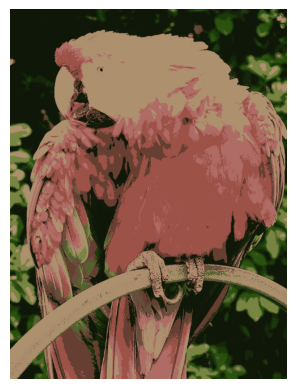

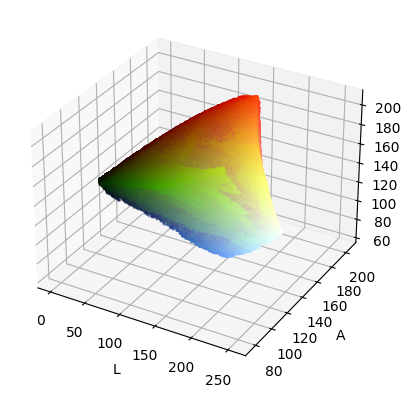

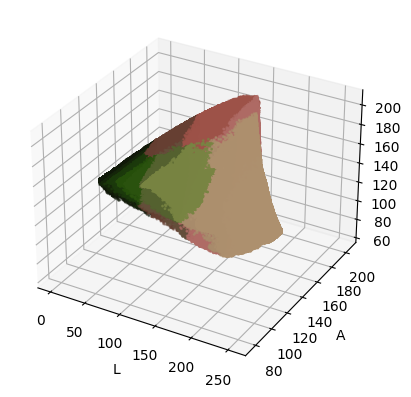

In [ ]:
BGRim = cv2.imread(r"/content/10-colourful-birds.jpg")
RGBim_original = cv2.cvtColor(BGRim, cv2.COLOR_BGR2RGB)
data, width = read_Lab_img_in_arr(BGRim)

# Initialize the MiniSom object with the appropriate parameters
# Train SOM
num_epochs =5
som = SOM(n_input=3, n_output=(4, 4), learning_rate=0.1)
som.train(data, num_epochs=num_epochs)

# Predict cluster labels
y = som.predict(data)

nearest_class = som.weights.reshape((-1, 3))
RGBim = change_img_pixels(nearest_class, y, data, width)
create_plot(RGBim)
l, a, b = data[:, 0], data[:, 1], data[:, 2]
colors = RGBim.reshape((len(l), 3))/255
colors_rgb = RGBim_original.reshape((len(l), 3))/255
plot_scatter(l, a, b, colors_rgb)
plot_scatter(l, a, b, colors)